## Importing and prepping data

In [2]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca
import os

In [3]:
features = []
remote_folder = 'Gel_studies' #Folder in AWS S3 containing files to be analyzed
bucket = 'dtoghani.data'
vids = 10
mws = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Deff2',
          'Mean Mean_Intensity', 'Std Mean_Intensity',
          'X', 'Y', 'Mean X', 'Mean Y', 'Std X', 'Std Y']
calcs = [3]

counter = 0
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            try:
                filename = 'features_{}_{}mM_XY{}.csv'.format(mw, calc, '%02d' % num)
                # os.remove(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[mw], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                #fstats['Calcium Concentration'] = pd.Series(fstats.shape[0]*[str(calcs)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skip filename: {}'.format(filename))

features_10k_PEG_3mM_XY01.csv
features_10k_PEG_3mM_XY02.csv
features_10k_PEG_3mM_XY03.csv
features_10k_PEG_3mM_XY04.csv
features_10k_PEG_3mM_XY05.csv
features_10k_PEG_3mM_XY06.csv
features_10k_PEG_3mM_XY07.csv
features_10k_PEG_3mM_XY08.csv
features_10k_PEG_3mM_XY09.csv
features_10k_PEG_3mM_XY10.csv
features_5k_PEG_3mM_XY01.csv
features_5k_PEG_3mM_XY02.csv
features_5k_PEG_3mM_XY03.csv
features_5k_PEG_3mM_XY04.csv
features_5k_PEG_3mM_XY05.csv
features_5k_PEG_3mM_XY06.csv
features_5k_PEG_3mM_XY07.csv
features_5k_PEG_3mM_XY08.csv
features_5k_PEG_3mM_XY09.csv
features_5k_PEG_3mM_XY10.csv
features_1k_PEG_3mM_XY01.csv
features_1k_PEG_3mM_XY02.csv
features_1k_PEG_3mM_XY03.csv
features_1k_PEG_3mM_XY04.csv
features_1k_PEG_3mM_XY05.csv
features_1k_PEG_3mM_XY06.csv
features_1k_PEG_3mM_XY07.csv
features_1k_PEG_3mM_XY08.csv
features_1k_PEG_3mM_XY09.csv
features_1k_PEG_3mM_XY10.csv
features_PS_COOH_3mM_XY01.csv
features_PS_COOH_3mM_XY02.csv
features_PS_COOH_3mM_XY03.csv
features_PS_COOH_3mM_XY04.csv


In [ ]:
fstats_new.to_csv('features.csv')

In [3]:
fstats_tot.shape

(1623799, 69)

In [4]:
for mw in mws:
    print(fstats_tot[fstats_tot['Particle Type'] == mw].shape)

(654975, 69)
(437414, 69)
(512800, 69)
(18610, 69)


In [5]:
##fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
#fstats_totMW = fstats_sub[fstats_sub['Particle Type'].isin(['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH'])].reset_index(drop=True)
#nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Calcium Concentration', 'Deff2']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [22]:
fstats_tot['LogDeff2'] = np.log(fstats_tot['Deff2']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff2'] = np.log(fstats_tot['Mean Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff2'] = np.log(pcadataset.final['Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff2'] = np.log(pcadataset.final['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

fstats_tot['LogDeff1'] = np.log(fstats_tot['Deff1']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff1'] = np.log(pcadataset.final['Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff1'] = np.log(pcadataset.final['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [23]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [24]:
X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].reset_index()
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].reset_index()

In [14]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-3.64049214 -0.42529382 -0.34990576]


In [37]:
types = ['PS_COOH', '1k_PEG', '5k_PEG', '10k_PEG']

In [22]:
types = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']

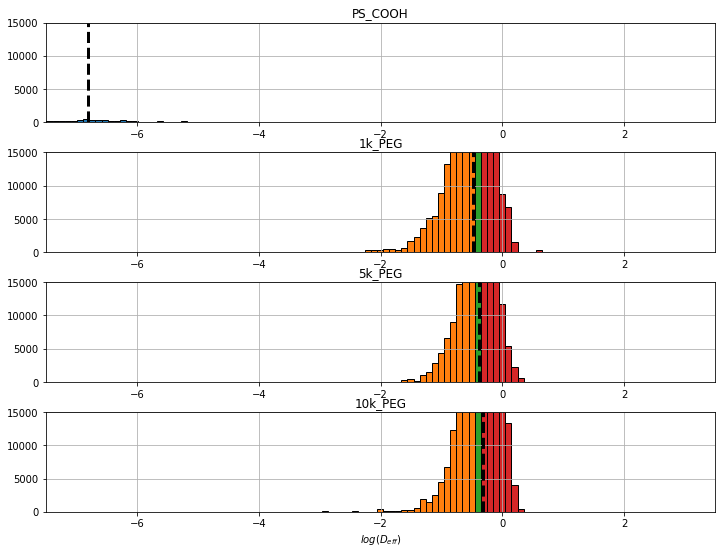

In [38]:
import matplotlib.pyplot as plt
Dbins = [-10, -3.64, -0.4243, -0.3499, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
#types = types_order
for ax in axes:
    means.append(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_train[(X_train['Particle Type']==types[counter]) & (Dbins[i] < X_train['LogMeanDeff2']) & (X_train['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

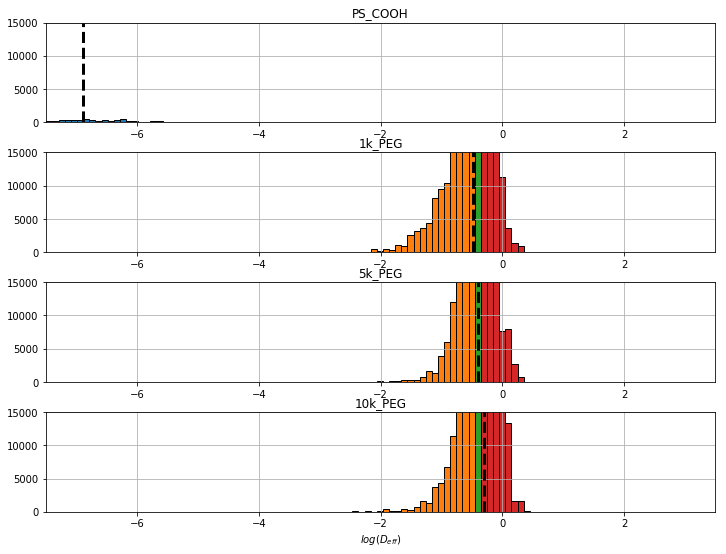

In [39]:
#Dbins = [-10, -6.538, -3.754, -0.808, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [20]:
newmap = cm.viridis(np.linspace(0.9, 0.0, 4))
labels3 = ['PS-PEG(10k)', 'PS-PEG(5k)', 'PS-PEG(1k)', 'PS-COOH']
types = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']

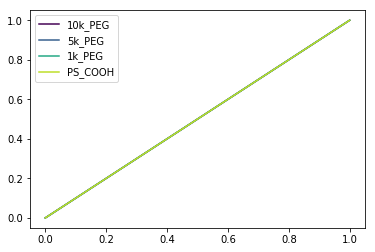

In [14]:
for i, mw in enumerate(mws):
    plt.plot([0,1], [0,1], c=newmap[3-i], label=mws[i])
    plt.legend()

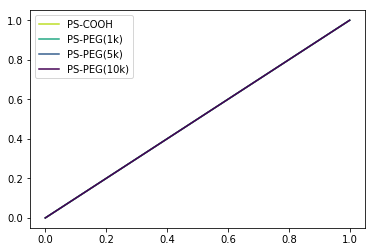

In [21]:
for i, mw in enumerate(types):
    plt.plot([0,1], [0,1], c=newmap[i], label=labels3[3-i])
    plt.legend()

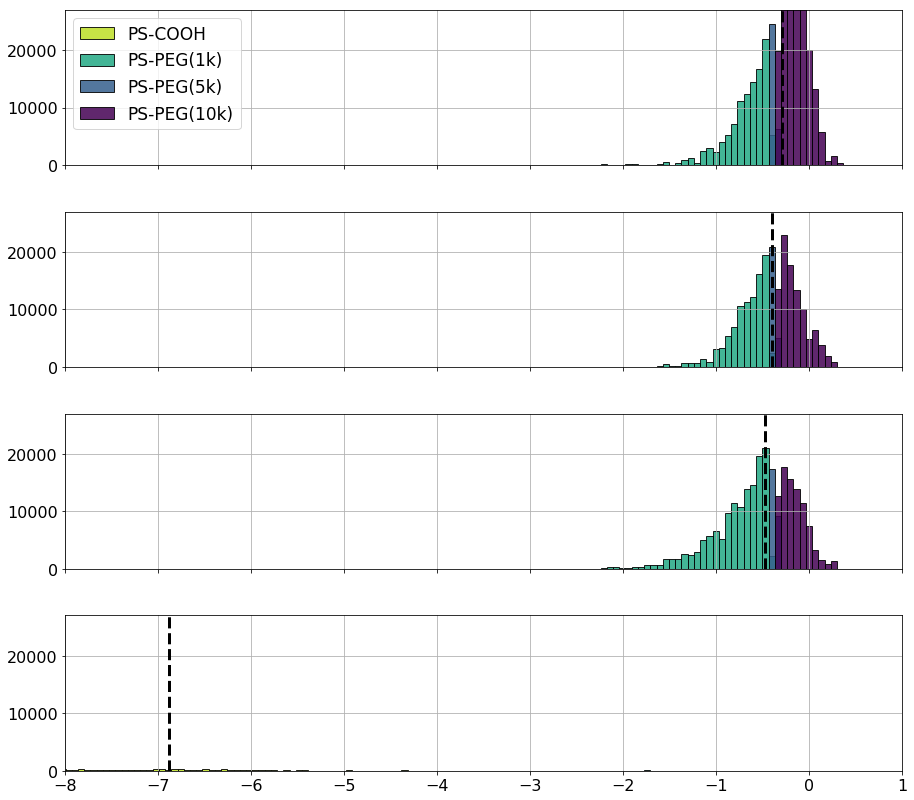

In [26]:
from matplotlib.pyplot import cm
Dbins = [-10, -3.64, -0.4243, -0.3499, 10]
bins = np.linspace(-10, 10, 300)
fig, axes = plt.subplots(nrows=4, figsize=(15, 14))
counter = 0
means = []
#labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(15,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-8, 1])
        ax.set_ylim([0, 27000])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    if counter == 0:
        ax.legend(fontsize=17)
    #ax.set_yticklabels([])
#     if counter == 3:
#         ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
    if counter != 3:
        ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/mw3_hist.png', dpi=300, pad_inches=0.1)

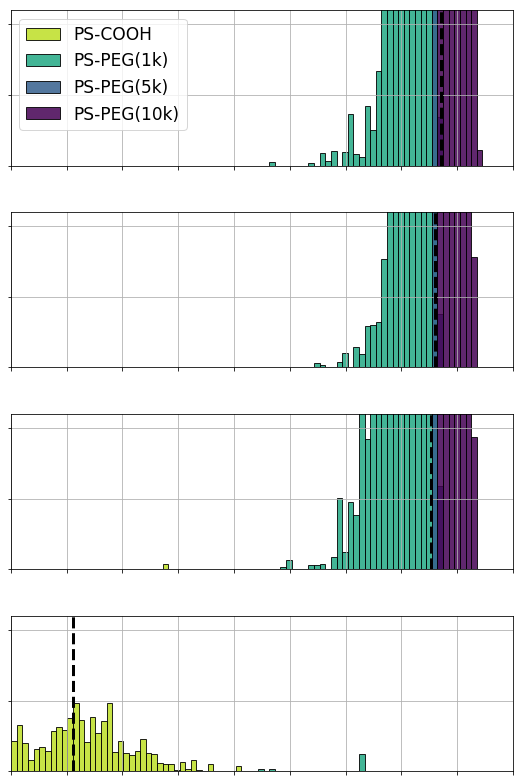

In [28]:
from matplotlib.pyplot import cm
Dbins = [-10, -3.64, -0.4243, -0.3499, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(9, 14))
counter = 0
means = []
#labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(9,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-8, 1])
        ax.set_ylim([0, 1100])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    if counter == 0:
        ax.legend(fontsize=17)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
#     if counter == 3:
#         ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
    if counter != 3:
        ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/mw3_hist_small.png', dpi=300, pad_inches=0.1)

In [30]:
from sklearn.metrics import classification_report

In [35]:
y_pred2 = list(pd.cut(X_train.LogMeanDeff2.values, bins=[-10, -3.64, -0.4243, -0.3499, 10], labels=types).astype(str))
y_true2 = X_train['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

    10k_PEG     0.4753    0.5359    0.5038    326581
     1k_PEG     0.3966    0.5459    0.4594    257612
     5k_PEG     0.2695    0.0990    0.1448    219202
    PS_COOH     0.9949    0.8919    0.9406      9225
        nan     0.0000    0.0000    0.0000         0

avg / total     0.4007    0.4253    0.3978    812620



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
y_pred2 = list(pd.cut(X_test.LogMeanDeff2.values, bins=[-10, -3.64, -0.4243, -0.3499, 10], labels=types).astype(str))
y_true2 = X_test['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

    10k_PEG     0.5073    0.5703    0.5370    328394
     1k_PEG     0.4079    0.5586    0.4715    255187
     5k_PEG     0.3116    0.1187    0.1719    218205
    PS_COOH     0.9952    0.9123    0.9520      9384
        nan     0.0000    0.0000    0.0000         0

avg / total     0.4290    0.4491    0.4230    811170



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [4]:
ncomp = 16
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.16482898298460635
1 component: 0.27083231160808446
2 component: 0.36830074570702737
3 component: 0.4324422163159433
4 component: 0.4848883962445392
5 component: 0.5324561059256545
6 component: 0.5720725002788611
7 component: 0.6097883907503733
8 component: 0.6462983455741523
9 component: 0.677201348197959
10 component: 0.7043200556132437
11 component: 0.730400970586186
12 component: 0.7533903555308266
13 component: 0.7746824769404332
14 component: 0.7923729352837281
15 component: 0.8090649804183587


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

In [8]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [9]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Mean straightness,Mean SN_Ratio,asymmetry3,Std asymmetry1,Mean frames,Mean frames,Mean_Intensity,trappedness,frames,Std asymmetry3,Std SN_Ratio,Deff1,Std kurtosis,Std MSD_ratio,kurtosis,kurtosis
1,Mean efficiency,Mean boundedness,elongation,Std asymmetry2,Mean kurtosis,Quality,Mean Quality,boundedness,straightness,Std asymmetry2,Std MSD_ratio,kurtosis,Mean kurtosis,Std SN_Ratio,Std Deff2,Std Deff2
2,Mean asymmetry3,Mean trappedness,asymmetry2,Mean asymmetry1,Std frames,frames,Quality,frames,D_fit,Std alpha,Mean MSD_ratio,D_fit,Std MSD_ratio,Mean MSD_ratio,Mean Deff2,D_fit
3,Mean alpha,Mean Quality,AR,Mean asymmetry2,Mean asymmetry2,trappedness,Std Quality,MSD_ratio,alpha,Mean alpha,Mean kurtosis,Std SN_Ratio,Std SN_Ratio,Std alpha,SN_Ratio,Mean Deff2
4,Mean Deff1,Std fractal_dim,asymmetry1,Std elongation,Mean straightness,boundedness,Mean AR,alpha,trappedness,Std asymmetry1,SN_Ratio,straightness,Mean MSD_ratio,Mean alpha,Std kurtosis,MSD_ratio


In [10]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Mean alpha', 'Std alpha',
       'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object')

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [5]:
import numpy as np
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='10k_PEG'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='1k_PEG'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_COOH'].values[:, -ncomp:], axis=0)

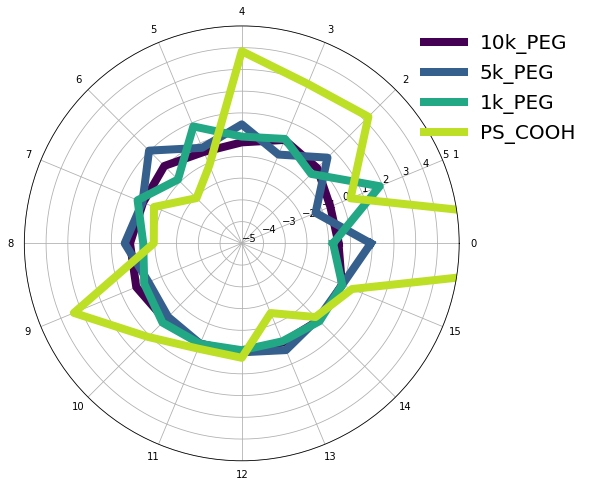

In [12]:
labels = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-5, 5, 11))

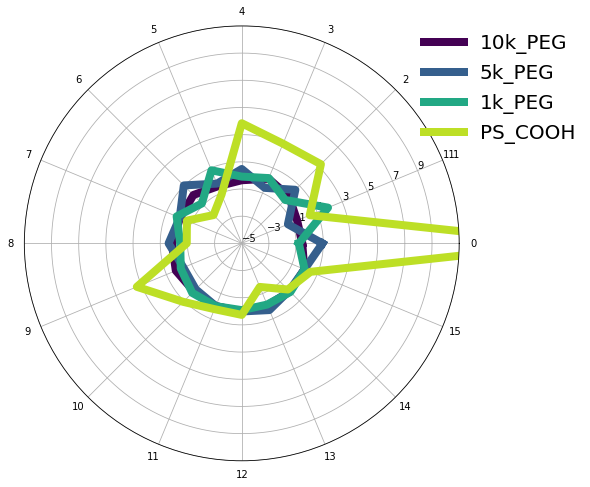

In [11]:
labels = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-5, 11, 9), filename='pics/mw3_pcaavg.png')

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

def feature_violin(df, label='label', lvals=['yes', 'no'], labels=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 4)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.setp(ax.collections, alpha=.75)
    L=ax.legend(loc='upper right', prop={'size': 18})
    for item, label in zip(L.get_texts(), labels):
        item.set_text(label)
    #ax.legend(prop={'size': 18})
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=300, pad_inches=0.22)

    return to_violin

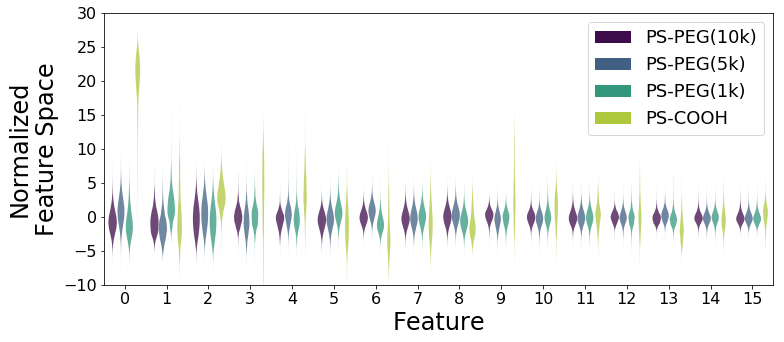

In [12]:
labels = mws
labels2 = ['PS-PEG(10k)', 'PS-PEG(5k)', 'PS-PEG(1k)', 'PS-COOH']
feats = feature_violin(pcadataset.final, label='Particle Type', lvals=labels, labels=labels2, fsubset=16, yrange=[-10, 30],
                       legendfontsize=21, labelsize=24, fname='./pics/mw3_pcadist.png')

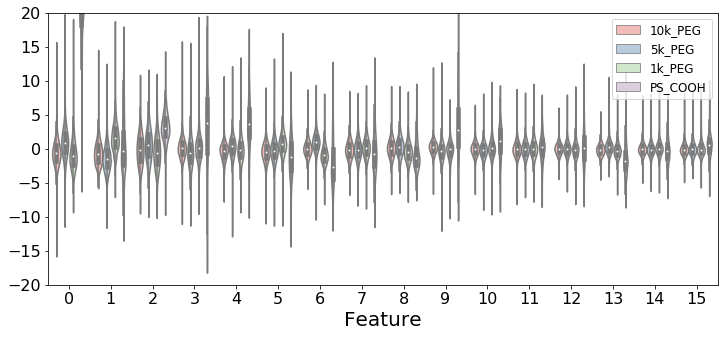

In [20]:
feats = pca.feature_violin(pcadataset.final, label='Particle Type', lvals=labels, fsubset=ncomp, yrange=[-20, 30])

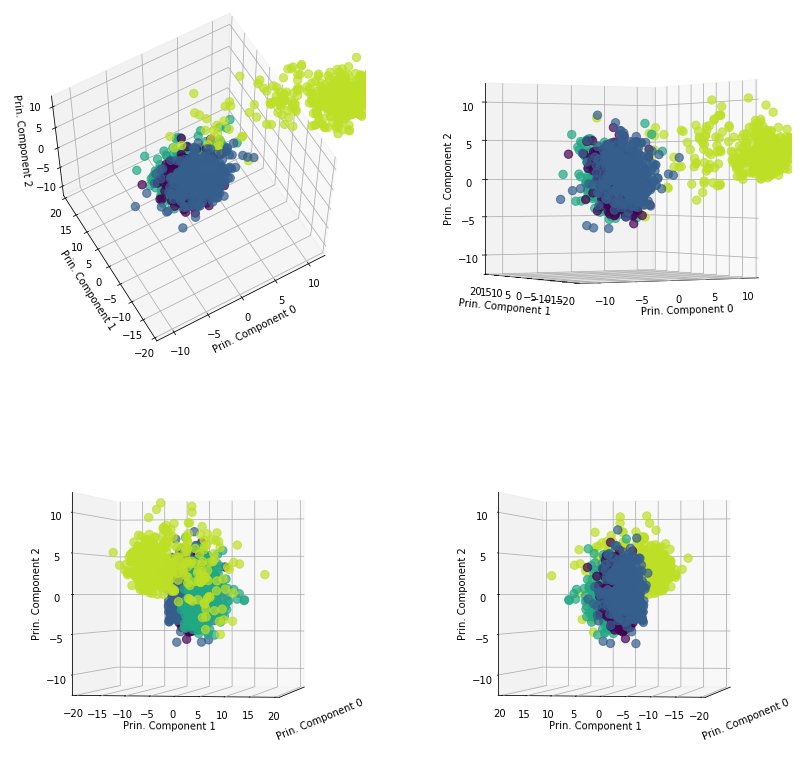

In [21]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Particle Type', lvals=labels, randcount=400, ylim=[-20, 20],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 1, 2])

## Neural Network

In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [17]:
featofvar = 'Particle Type'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.22229774
Validation score: 0.925771
Iteration 2, loss = 0.16629538
Validation score: 0.945129
Iteration 3, loss = 0.12984347
Validation score: 0.958503
Iteration 4, loss = 0.10267694
Validation score: 0.970789
Iteration 5, loss = 0.08427323
Validation score: 0.964795
Iteration 6, loss = 0.07160631
Validation score: 0.982182
Iteration 7, loss = 0.06348908
Validation score: 0.986934
Iteration 8, loss = 0.05743481
Validation score: 0.983680
Iteration 9, loss = 0.05343006
Validation score: 0.990331
Iteration 10, loss = 0.04949065
Validation score: 0.990711
Iteration 11, loss = 0.04749149
Validation score: 0.991922
Iteration 12, loss = 0.04626886
Validation score: 0.987724
Iteration 13, loss = 0.04470843
Validation score: 0.991471
Iteration 14, loss = 0.04245655
Validation score: 0.993647
Iteration 15, loss = 0.04218887
Validation score: 0.991173
Iteration 16, loss = 0.04137313
Validation score: 0.986821
Iteration 17, loss = 0.04035775
Validation score: 0.990444
Valida

Text(0,0.5,'Validation Scores')

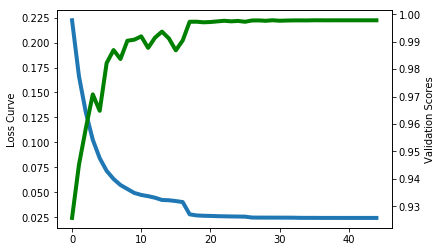

In [19]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.94, 0.99])
ax2.set_ylabel('Validation Scores')

## Alternate binning

In [5]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [6]:
featofvar = 'Particle Type'

X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.21063418
Validation score: 0.938446
Iteration 2, loss = 0.12761173
Validation score: 0.967340
Iteration 3, loss = 0.07911922
Validation score: 0.979068
Iteration 4, loss = 0.05422496
Validation score: 0.990180
Iteration 5, loss = 0.04208733
Validation score: 0.991570
Iteration 6, loss = 0.03536244
Validation score: 0.993219
Iteration 7, loss = 0.03118714
Validation score: 0.995102
Iteration 8, loss = 0.02833975
Validation score: 0.993404
Iteration 9, loss = 0.02644953
Validation score: 0.995078
Iteration 10, loss = 0.02522201
Validation score: 0.995951
Iteration 11, loss = 0.02399570
Validation score: 0.996394
Iteration 12, loss = 0.02346333
Validation score: 0.997022
Iteration 13, loss = 0.02272413
Validation score: 0.995988
Iteration 14, loss = 0.02219803
Validation score: 0.997108
Iteration 15, loss = 0.02156797
Validation score: 0.997342
Iteration 16, loss = 0.02143090
Validation score: 0.997699
Iteration 17, loss = 0.02104032
Validation score: 0.997440
Iterat